Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

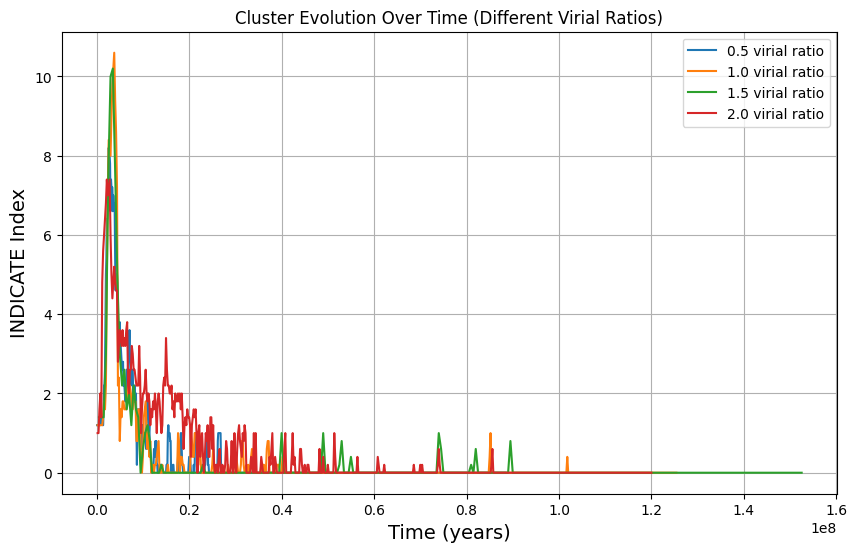

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from nbd_utils_code import nbd_read  


cluster_radius = 0.5  
n_neighbors = 5  


simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_52M_120Mev_2.0vir'
}


def generate_control_distribution(N, radius):
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    u = np.random.uniform(0, 1, N)

    theta = np.arccos(costheta)
    r = radius * u ** (1/3)  
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    return np.vstack((x, y, z)).T


def nearest_neighbors(positions, n_neighbors=3):
    tree = cKDTree(positions)
    distances, _ = tree.query(positions, k=n_neighbors)
    return distances[:, n_neighbors-1]  


def mean_neighbor_distance(control_positions, n_neighbors=5):
    tree = cKDTree(control_positions)
    distances, _ = tree.query(control_positions, k=n_neighbors)
    return np.mean(distances[:, n_neighbors-1])

def calculate_indicate_index(positions, control_positions, n_neighbors=5):
    mean_dist = mean_neighbor_distance(control_positions, n_neighbors)
    nearest_dist = nearest_neighbors(positions, n_neighbors)
    
    
    counts = np.sum(nearest_dist < mean_dist)
    index = counts / n_neighbors
    return index

simulation_results = {}

for label, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    indicate_results = []  

    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath) 
        
        positions = np.vstack((data.x, data.y, data.z)).T 
        
        control_positions = generate_control_distribution(len(positions), cluster_radius)
        
        indicate_value = calculate_indicate_index(positions, control_positions, n_neighbors)
        
        indicate_results.append((data.time, indicate_value))
    
    indicate_results = sorted(indicate_results, key=lambda x: x[0])
    
    simulation_results[label] = indicate_results

plt.figure(figsize=(10, 6))

for label, results in simulation_results.items():
    times, indicate_values = zip(*results)
    plt.plot(times, indicate_values, linestyle='-', label=label)



plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('INDICATE Index', fontsize=14)
plt.title('Cluster Evolution Over Time (Different Virial Ratios)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

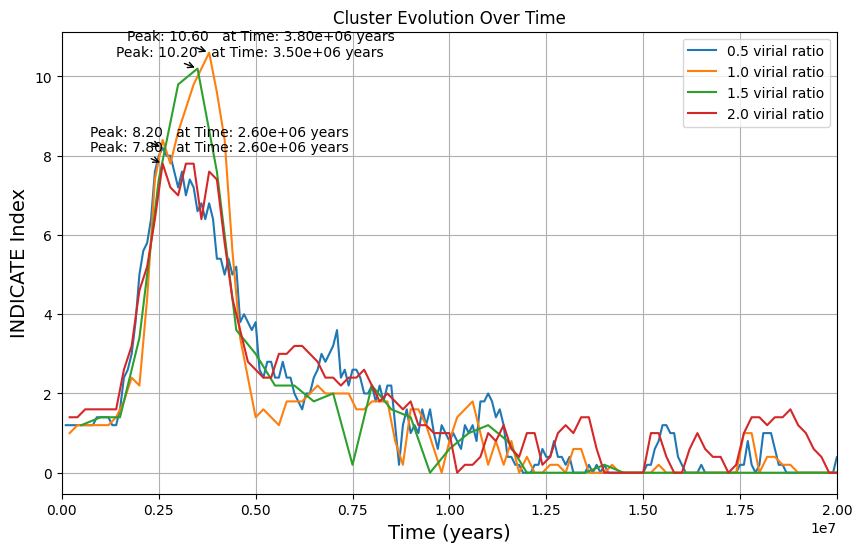

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from nbd_utils_code import nbd_read  


cluster_radius = 0.5  
n_neighbors = 5  

simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'
}

def generate_control_distribution(N, radius):
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    u = np.random.uniform(0, 1, N)

    theta = np.arccos(costheta)
    r = radius * u ** (1/3)  
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    return np.vstack((x, y, z)).T

def nearest_neighbors(positions, n_neighbors=3):
    tree = cKDTree(positions)
    distances, _ = tree.query(positions, k=n_neighbors)
    return distances[:, n_neighbors-1]  

def mean_neighbor_distance(control_positions, n_neighbors=5):
    tree = cKDTree(control_positions)
    distances, _ = tree.query(control_positions, k=n_neighbors)
    return np.mean(distances[:, n_neighbors-1])

def calculate_indicate_index(positions, control_positions, n_neighbors=5):
    mean_dist = mean_neighbor_distance(control_positions, n_neighbors)
    nearest_dist = nearest_neighbors(positions, n_neighbors)
    
    counts = np.sum(nearest_dist < mean_dist)
    index = counts / n_neighbors
    return index

simulation_results = {}

for label, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    indicate_results = []  

    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath) 
        
        positions = np.vstack((data.x, data.y, data.z)).T 
        
        control_positions = generate_control_distribution(len(positions), cluster_radius)
        
        indicate_value = calculate_indicate_index(positions, control_positions, n_neighbors)
        
        indicate_results.append((data.time, indicate_value))
    
    indicate_results = sorted(indicate_results, key=lambda x: x[0])
    
    simulation_results[label] = indicate_results

plt.figure(figsize=(10, 6))

for label, results in simulation_results.items():
    times, indicate_values = zip(*results)
    plt.plot(times, indicate_values, linestyle='-', label=label)

    # Find the highest peak and its time
    peak_value = max(indicate_values)
    peak_time = times[indicate_values.index(peak_value)]

    # Annotate the peak on the plot with time and value
    peak_annotation = f'Peak: {peak_value:.2f}'
    time_annotation = f'   at Time: {peak_time:.2e} years'

    # Adjust the position for each annotation separately
    plt.annotate(peak_annotation, 
                 xy=(peak_time, peak_value), 
                 xytext=(peak_time, peak_value + 0.3),  # Adjust offset as needed
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10,
                 ha='right')

    plt.annotate(time_annotation, 
                 xy=(peak_time, peak_value), 
                 xytext=(peak_time, peak_value + 0.3),  # Adjust offset as needed
                 fontsize=10,
                 ha='left')


plt.xlim(0, 2e7)
plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('INDICATE Index', fontsize=14)
plt.title('Cluster Evolution Over Time')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

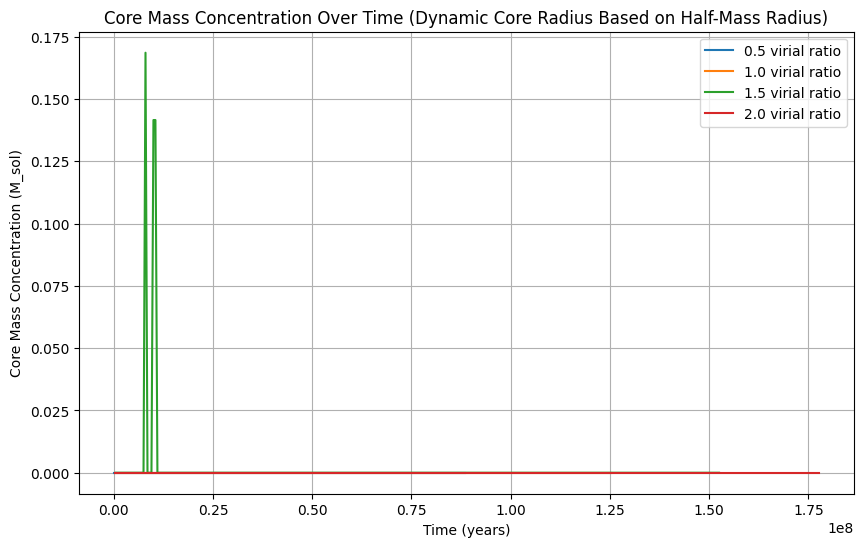

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read

# Fraction of half-mass radius to use for core region
core_fraction = 0.1  # 10% of the half-mass radius

# Function to calculate the half-mass radius
def calculate_half_mass_radius(x, y, z, m):
    # Calculate distances from the cluster center (here assumed to be (0, 0, 0))
    distances = np.sqrt(x**2 + y**2 + z**2)

    # Sort stars by distance
    sorted_indices = np.argsort(distances)
    sorted_distances = distances[sorted_indices]
    sorted_masses = m[sorted_indices]

    # Cumulative mass
    cumulative_mass = np.cumsum(sorted_masses)

    # Total mass
    total_mass = cumulative_mass[-1]

    # Find the index where half of the total mass is reached
    half_mass_index = np.searchsorted(cumulative_mass, total_mass / 2)

    # The corresponding distance is the half-mass radius
    half_mass_radius = sorted_distances[half_mass_index]
    return half_mass_radius

# Function to calculate the core mass based on a dynamic core radius (fraction of the half-mass radius)
def calculate_core_mass(x, y, z, m, half_mass_radius, core_fraction):
    core_radius = core_fraction * half_mass_radius  # Core radius as a fraction of half-mass radius
    distances = np.sqrt(x**2 + y**2 + z**2)  # distance from the center (0,0,0)
    core_mask = distances < core_radius  # boolean mask for stars within the core radius
    core_mass = np.sum(m[core_mask])  # sum of masses within the core radius
    return core_mass

# Dictionary to hold results for each virial ratio
core_mass_over_time = {key: [] for key in simulation_directories.keys()}
times_over_time = {key: [] for key in simulation_directories.keys()}

# Loop through each simulation directory
for virial_ratio, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])
    
    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        # Get positions and masses
        x, y, z = data.x, data.y, data.z
        m = data.mass

        # Calculate half-mass radius for this snapshot
        half_mass_radius = calculate_half_mass_radius(x, y, z, m)

        # Calculate core mass using a fraction of the half-mass radius
        core_mass = calculate_core_mass(x, y, z, m, half_mass_radius, core_fraction)

        # Store time and core mass
        times_over_time[virial_ratio].append(data.time)
        core_mass_over_time[virial_ratio].append(core_mass)

# Plotting core mass concentration over time for each virial ratio
plt.figure(figsize=(10, 6))

for virial_ratio, times in times_over_time.items():
    plt.plot(times, core_mass_over_time[virial_ratio], label=f'{virial_ratio}')

plt.xlabel('Time (years)')
plt.ylabel('Core Mass Concentration (M_sol)')
plt.title('Core Mass Concentration Over Time (Dynamic Core Radius Based on Half-Mass Radius)')
plt.legend()
plt.grid(True)
plt.show()
